# PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle (Jupiter notebook для Kaggle)

#### Варламов Александр (поток DSPR-131)

## Predict HotelBooking Rating

# 1. Problem(Проблема)

#### Проблема:

Одна из проблем компании Booking.com — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.

#### Цель проекта:

**Построить модель на основе алгоритма машинного обучения - RandomForestRegressor, которая предсказывает рейтинг отеля.**

#### Задачи проекта:

1. Ознакомиться с входными данными;
2. Изучить пример машинного обучения (scikit-learn класс RandomForestRegressor);
3. Выполнить подготовку данных, которые будут использованы для обучения модели;
4. Проверить эффективность предлагаемой модели, используя метрику MAPE;
5. Принять участие в соревнованиях на площадке Kaggle (kaggle.com).

## 2. Collection(Сбор данных)

### Импорт необходимых библиотек и функций

In [1]:
# cтандартные python библиотеки
import os
import time

# базовые DS библиотеки
import numpy as np 
import pandas as pd

# библиотеки визуализации
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# функции для разделения датасета:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# библиотеки для кодирования данных
import category_encoders as ce

# статистические тесты
from scipy.stats import normaltest # Тест на нормальность Д'Агостино
import scipy.stats as stats

# для подсчета тегов
from collections import Counter

# Для анализа тональности текста
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [2]:
# фиксируем RANDOM_SEED, для воспроизводимости кода.
RANDOM_SEED = 1369

In [3]:
# фиксируем версии установленных пакетов
!pip freeze > requrements.txt

### Загружаем данные

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Данные загружены с соревнования на сайте Kaggle [[SF-DST] Booking reviews](https://www.kaggle.com/competitions/sf-booking) 

```
# для Jupiter notebook на сайте Kaggle
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
DATA_DIR = '/kaggle/input/sf-booking/'
hotels_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # данные для анализа и построения модели
hotels_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # данные для тестирования модели
submission = pd.read_csv(DATA_DIR+'/submission.csv') # формат предоставления данных на соревнование
```

In [5]:
# для работы на локальном компьютере
hotels_train = pd.read_csv('data/hotels_train.csv') # данные для анализа и построения модели
hotels_test =  pd.read_csv('data/hotels_test.csv') # данные для тестирования модели
submission_df = pd.read_csv('data/submission.csv') # формат предоставления данных на соревнование

### Первичный анализ

#### hotels_train

In [6]:
# формируем и выводим информацию
display(hotels_train.info())
display(hotels_train.head(1))
display(hotels_train.tail(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

None

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
386802,25 Courtfield Gardens Kensington and Chelsea L...,222,8/5/2016,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,20,2,8.8,"[' Leisure trip ', ' Couple ', ' Bunk Bed Room...",363 day,51.493109,-0.190208


#### hotels_test

In [7]:
# формируем и выводим информацию
display(hotels_test.info())
display(hotels_test.head(1))
display(hotels_test.tail(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

None

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
128934,202 rue de Rivoli 1st arr 75001 Paris France,297,12/23/2015,8.0,Saint James Albany Paris Hotel Spa,United Kingdom,rooms were very dated and old fashion,8,2868,No Positive,0,1,"[' Leisure trip ', ' Couple ', ' Standard Room...",589 day,48.864269,2.330818


#### submission

In [8]:
# формируем и выводим информацию
display(submission_df.info())
display(submission_df.head(1))
display(submission_df.tail(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


None

,reviewer_score,id
0,1,488440


,reviewer_score,id
128934,5,103157


#### Краткие выводы и комментарии

**Первоначальные версии hotyels_train и hotels_test содержат признаки:** 

* hotel_address — адрес отеля;
* review_date — дата, когда рецензент разместил соответствующий отзыв;
* average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* hotel_name — название отеля;
* reviewer_nationality — страна рецензента;
* negative_review — отрицательный отзыв, который рецензент дал отелю;
* review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
* positive_review — положительный отзыв, который рецензент дал отелю;
* review_total_positive_word_counts — общее количество слов в положительном отзыве;
* total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
* total_number_of_reviews — общее количество действительных отзывов об отеле;
* tags — теги, которые рецензент дал отелю;
* days_since_review — количество дней между датой проверки и датой очистки;
* additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
* lat — географическая широта отеля;
* lng — географическая долгота отеля.

**Так же первоначальная версия hotyels_train содержит:** 
* reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта; 

*В hotels_test данный признак отсутсвует, так как на необходимо его расчитать.*

**Первоначальная версия submission содержит признаки:**
* reviewer_score - расчетный рейтинг;
* id - id отеля

*NB! Количество строк соответствует тестовой выборке hotels_test.*

#### Предобработка данных

***NB! Для корректной обработки признаков необходимо объеденить hotels_train и hotels_test в один dataset.***

In [9]:
# формируем дополнительный признак для разделения тренировочной выборки от тестовой: присваиваем данные 1 - тренировочная выборка, 0 - тестовая выборка.
hotels_train['sample'] = 1
hotels_test['sample'] = 0

# создаем отсутсвующий признак "reviewer_score" в hotels_test и на данном этапе заполняем - 0.
hotels_test['reviewer_score'] = 0  

# объединяем данные в один dataset
hotels_df = pd.concat([hotels_train, hotels_test], ignore_index=True)
hotels_df['sample'] = hotels_df['sample'].astype('category')

In [10]:
# выводим информацию по объединенному dataset
display(hotels_df.info())
display(hotels_df.describe())
display(hotels_df.describe(include=object))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   hotel_address                               515738 non-null  object  
 1   additional_number_of_scoring                515738 non-null  int64   
 2   review_date                                 515738 non-null  object  
 3   average_score                               515738 non-null  float64 
 4   hotel_name                                  515738 non-null  object  
 5   reviewer_nationality                        515738 non-null  object  
 6   negative_review                             515738 non-null  object  
 7   review_total_negative_word_counts           515738 non-null  int64   
 8   total_number_of_reviews                     515738 non-null  int64   
 9   positive_review                             515738 non-null

None

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,6.297672,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,3.902295,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.625000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,7.900000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


,hotel_address,review_date,hotel_name,reviewer_nationality,negative_review,positive_review,tags,days_since_review
count,515738,515738,515738,515738,515738,515738,515738,515738
unique,1493,731,1492,227,330011,412601,55242,731
top,163 Marsh Wall Docklands Tower Hamlets London ...,8/2/2017,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,No Positive,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days
freq,4789,2585,4789,245246,127890,35946,5101,2585


In [11]:
# формируем и выводим информацию для дополнительной проверки объединенного dataset
display(f'Общее количество записей  в 2х объединеных dataset {hotels_train.shape[0] + hotels_test.shape[0]}.')

'Общее количество записей  в 2х объединеных dataset 515738.'

**Комментарии / выводы:**

1. Объединенный dataset имеет размерность 515738 строк, 18 признаков;
2. Признаки имеют тип данных: float64(4), int64(6), object(8).

## 3. Cleaning(Очистка данных).

На данном этапе определяются пропуски, аномалии и выбросы в данных.

### 3.1 Обработка пропусков.

In [12]:
# формируем и выводим информацию о наличие пропусков в признаках (%) 
cols_null_percent = hotels_df.isnull().mean() * 100 # все признаки с информацие о количестве пропусков (%) 
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False) # признаки с наличием пропусков (%)
display(cols_with_null)
#display(cols_null_percent)

lat    0.633655
lng    0.633655
dtype: float64

In [13]:
# формируем и выводим информацию о наличие пропусков в признаках (количество) 
cols_null = hotels_df.isna().sum() # все признаки с информацие о количестве пропусков (количество) 
display(cols_null[cols_null > 0])

lat    3268
lng    3268
dtype: int64

In [14]:
# вормируем и выводим информацию о количестве уникальных значений в пропусках
hotels_isnull = hotels_df[hotels_df['lat'].isnull() | hotels_df['lng'].isnull()]
list_null = hotels_isnull[['hotel_name', 'hotel_address']].value_counts()
#list_isnull = hotels_isnull['hotel_name'].unique()
display(list_null)


hotel_name                                        hotel_address                                              
Fleming s Selection Hotel Wien City               Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria    658
Hotel City Central                                Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria            563
Hotel Atlanta                                     W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria       389
Maison Albar Hotel Paris Op ra Diamond            4 rue de la P pini re 8th arr 75008 Paris France               290
Hotel Daniel Vienna                               Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria         245
Hotel Pension Baron am Schottentor                W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria          223
Austria Trend Hotel Schloss Wilhelminenberg Wien  Savoyenstra e 2 16 Ottakring 1160 Vienna Austria               194
Derag Livinghotel Kaiser Franz Joseph Vienna      Sieveringer Stra e 4 

**Комментарии / выводы:**
1. Пропуски содержатся в 2х признаках "lat" и "lng", количество записей составляет 3268 в каждом признаке или 0,63%;
1. Количество уникальных значений составляет - 17, по которым не заполнена информация по широте и долготе;
2. С учетом малого количества информации предлагается в ручном режиме с помощью адреса отеля определить данные широты и долготы и внести информацию в таблицу.

In [15]:
# формируем словарь с данными по широте
dict_lat = {'Austria Trend Hotel Schloss Wilhelminenberg Wien': '48.21974808057666', 
                'Holiday Inn Paris Montmartre': '48.889064368690235',
                'Fleming s Selection Hotel Wien City': '48.20949471863499',
                'Hotel Atlanta': '48.2209723965124',
                'Maison Albar Hotel Paris Op ra Diamond': '48.87543722920124',
                'Derag Livinghotel Kaiser Franz Joseph Vienna': '48.24608017805536',
                'Hotel City Central': '48.214201786014854',
                'NH Collection Barcelona Podium': '41.39176529029773',
                'City Hotel Deutschmeister': '48.22103057609981',
                'Hotel Daniel Vienna': '48.18897212994251',
                'Roomz Vienna': '48.22382961585223',
                'Hotel Pension Baron am Schottentor': '48.21692824899107',
                'Mercure Paris Gare Montparnasse': '48.84010021974514',
                'Hotel Park Villa': '48.23759024291264',
                'Hotel Advance': '41.38327316014033',
                'Renaissance Barcelona Hotel': '41.394162363243964',
                'Cordial Theaterhotel Wien': '48.20969901650749'}

In [16]:
# формируем словарь с данными по долготе
dict_lng = {'Austria Trend Hotel Schloss Wilhelminenberg Wien': '16.285624283904383', 
                'Holiday Inn Paris Montmartre': '2.333206641604505',
                'Fleming s Selection Hotel Wien City': '16.35350997041095',
                'Hotel Atlanta': '16.356650516337886',
                'Maison Albar Hotel Paris Op ra Diamond': '2.3234027262612256',
                'Derag Livinghotel Kaiser Franz Joseph Vienna': '16.34202545691955',
                'Hotel City Central': '16.379923233140797',
                'NH Collection Barcelona Podium': '2.1783660658934747',
                'City Hotel Deutschmeister': '16.366622226233126',
                'Hotel Daniel Vienna': '16.3838329415743',
                'Roomz Vienna': '16.393969343883455',
                'Hotel Pension Baron am Schottentor': '16.360055901096636',
                'Mercure Paris Gare Montparnasse': '2.3231778953046462',
                'Hotel Park Villa': '16.34703938556462',
                'Hotel Advance': '2.162964217594162',
                'Renaissance Barcelona Hotel': '2.1748749075722924',
                'Cordial Theaterhotel Wien': '16.351495483903957'}

In [17]:
# формируем код и производим заполнение данных в dataframe
hotels_df['lat'] = hotels_df.apply(lambda x: dict_lat.get(x['hotel_name']) if pd.isnull(x['lat']) else x['lat'], axis=1).astype('float64') # вводим данные по широте и устанавливаем тип float64
hotels_df['lng'] = hotels_df.apply(lambda x: dict_lng.get(x['hotel_name']) if pd.isnull(x['lng']) else x['lng'], axis=1).astype('float64') # вводим данные по долготе и устанавливаем тип float64

In [18]:
# формируем и выводим повторно информацию о наличие пропусков после обработки
display(hotels_df.isnull().sum())

hotel_address                                 0
additional_number_of_scoring                  0
review_date                                   0
average_score                                 0
hotel_name                                    0
reviewer_nationality                          0
negative_review                               0
review_total_negative_word_counts             0
total_number_of_reviews                       0
positive_review                               0
review_total_positive_word_counts             0
total_number_of_reviews_reviewer_has_given    0
reviewer_score                                0
tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
sample                                        0
dtype: int64

### 3.2 Обработка дубликатов

***Дубликатами*** называются записи, для которых значения (всех или большинства) признаков совпадают. 

In [19]:
# формируем и выводим информацию о наличие дубликатов
hotels_dublicate = hotels_df[hotels_df.duplicated()]
display(f'Количество дубликатов в dataset составляет {hotels_dublicate.shape[0]} шт.')

'Количество дубликатов в dataset составляет 336 шт.'

In [20]:
# формируем и выводим информацию о количестве дубликатов в разрезе наимменований отелей
hotels_dublicate['hotel_name'].value_counts()

H tel Concorde Montparnasse               235
H tel Baume                                50
Hotel Le Sainte Beuve                      35
Villa Eugenie                               9
Pertschy Palais Hotel                       1
The Bloomsbury Hotel                        1
Hotel Da Vinci                              1
Mercure Paris Centre Tour Eiffel            1
Park Plaza Vondelpark Amsterdam             1
Fletcher Hotel Amsterdam                    1
Copthorne Tara Hotel London Kensington      1
Name: hotel_name, dtype: int64

In [21]:
# формируем и выводим информацию о % дубликатов к общему количеству записей по первым 4 позициям
index_1 = (hotels_dublicate.loc[hotels_dublicate['hotel_name'] == 'H tel Concorde Montparnasse'].shape[0] / hotels_df.loc[hotels_df['hotel_name'] == 'H tel Concorde Montparnasse'].shape[0])*100
display(f'Количество дубликатов по отелю "H tel Concorde Montparnasse" составляет {round(index_1, 2)}% от общего количества записей.')

index_2 = (hotels_dublicate.loc[hotels_dublicate['hotel_name'] == 'H tel Baume'].shape[0] / hotels_df.loc[hotels_df['hotel_name'] == 'H tel Baume'].shape[0])*100
display(f'Количество дубликатов по отелю "H tel Baume" составляет {round(index_2, 2)}% от общего количества записей.')

index_3 = (hotels_dublicate.loc[hotels_dublicate['hotel_name'] == 'Hotel Le Sainte Beuve'].shape[0] / hotels_df.loc[hotels_df['hotel_name'] == 'Hotel Le Sainte Beuve'].shape[0])*100
display(f'Количество дубликатов по отелю "Hotel Le Sainte Beuve" составляет {round(index_3, 2)}% от общего количества записей.')

index_4 = (hotels_dublicate.loc[hotels_dublicate['hotel_name'] == 'Villa Eugenie'].shape[0] / hotels_df.loc[hotels_df['hotel_name'] == 'Villa Eugenie'].shape[0])*100
display(f'Количество дубликатов по отелю "Villa Eugenie" составляет {round(index_4, 2)}% от общего количества записей.')

'Количество дубликатов по отелю "H tel Concorde Montparnasse" составляет 33.96% от общего количества записей.'

'Количество дубликатов по отелю "H tel Baume" составляет 28.41% от общего количества записей.'

'Количество дубликатов по отелю "Hotel Le Sainte Beuve" составляет 35.71% от общего количества записей.'

'Количество дубликатов по отелю "Villa Eugenie" составляет 14.52% от общего количества записей.'

In [22]:
# формируем и выводим информацию о количестве дубликатов в выборке train и test
hotels_dublicate_train = hotels_df[hotels_df['sample'] == 1]
hotels_dublicate_test = hotels_df[hotels_df['sample'] == 0]

display(f'Количество дубликатов в выборке train: {hotels_dublicate_train[hotels_dublicate_train.duplicated()].shape[0]}.')
display(f'Количество дубликатов в выборке test: {hotels_dublicate_test[hotels_dublicate_test.duplicated()].shape[0]}.')

'Количество дубликатов в выборке train: 307.'

'Количество дубликатов в выборке test: 29.'

**Комментарии / выводы:**

1. Общее количество дубликатов в dataset составляет 336 записей или 0,07% от общего количества;
2. Так же есть четыре отеля по которым дубликаты составляют от 14.52% до 35.71% что может существенно искажать модель по данным отелям, а так же о манипуляциях оценками по данным отелям;
3. ***В связи с тем, что измененять количество наблюдений в данных test нельзя, что повлияет на формат submission удаляем дубликаты только в выборке train.***
4. При анализе дубликатов было выявлены пропуске в имени 2х отелей, исправим их.   

In [23]:
# вносим изменения в название отелей
replace_dict = {'H tel Concorde Montparnasse':'Hotel Concorde Montparnasse', 'H tel Baume':'Hotel Baume'}
hotels_df['hotel_name'] = hotels_df['hotel_name'].replace(replace_dict)

In [24]:
# делим dataframe на 2 выборки и удаляем дубликаты только в train
dublicate = hotels_df.query('sample == 1').drop_duplicates()
dublicate_0 = hotels_df.query('sample == 0')

In [25]:
# объединяем dataframe 
hotels_df = pd.concat([dublicate, dublicate_0], ignore_index=True)

### 3.3 Обработка выбросов (аномалий).

***Выброс (аномалия)*** — это наблюдение, которое существенно выбивается из общего распределения и сильно отличается от других данных.

In [26]:
# формируем и выводим информацию о признаках имеющих числовой тип данных
numerical_features_df = hotels_df.select_dtypes(include='number')
display(numerical_features_df.describe())

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
count,515431.000000,515431.000000,515431.000000,515431.000000,515431.000000,515431.000000,515431.000000,515431.000000,515431.000000
mean,498.275079,8.397630,18.539760,2744.259084,17.777342,7.165215,6.296715,49.432751,2.893772
std,500.618961,0.548033,29.690973,2317.823718,21.803204,11.038742,3.902967,3.461230,4.668792
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,48.214202,-0.143372
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,7.900000,51.499981,0.019886
75%,660.000000,8.800000,23.000000,3633.000000,22.000000,8.000000,9.600000,51.516288,4.841163
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [27]:
# формируем лист с названием признаков
numerical_features = hotels_df.select_dtypes(include='number').columns.to_list()
display(numerical_features)

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'reviewer_score',
 'lat',
 'lng']

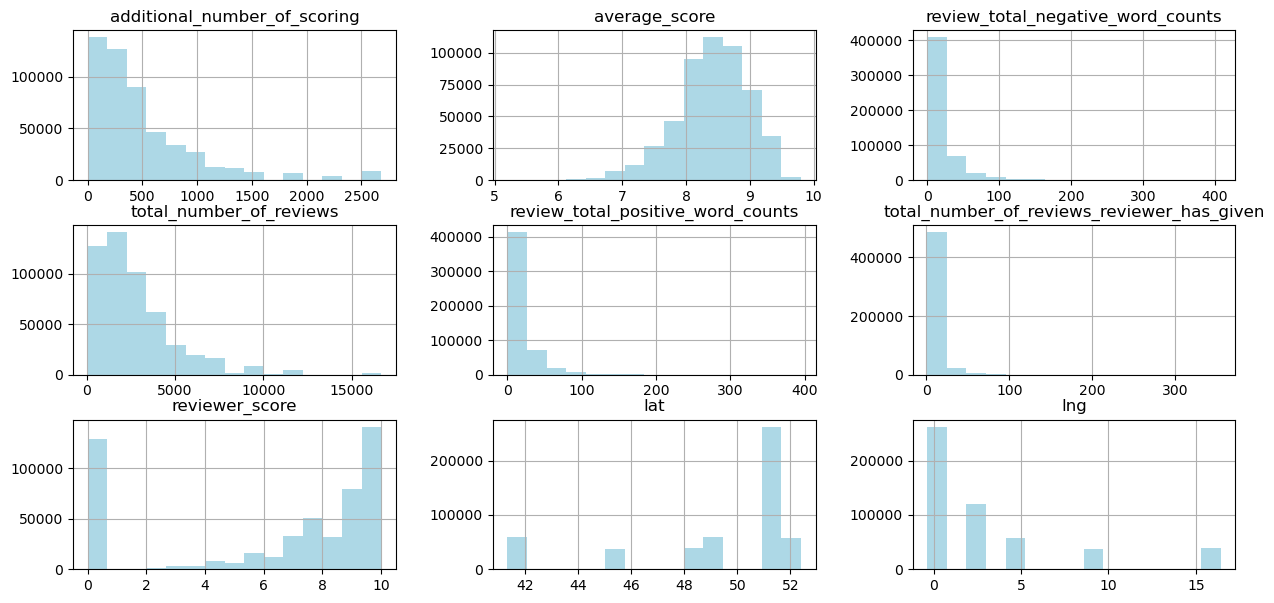

In [28]:
# формируем график - гистограмму по числовым признакам для визуальной оценке распределения признаков
hotels_df[numerical_features].hist(figsize=(15, 7), color='lightblue', bins=15);

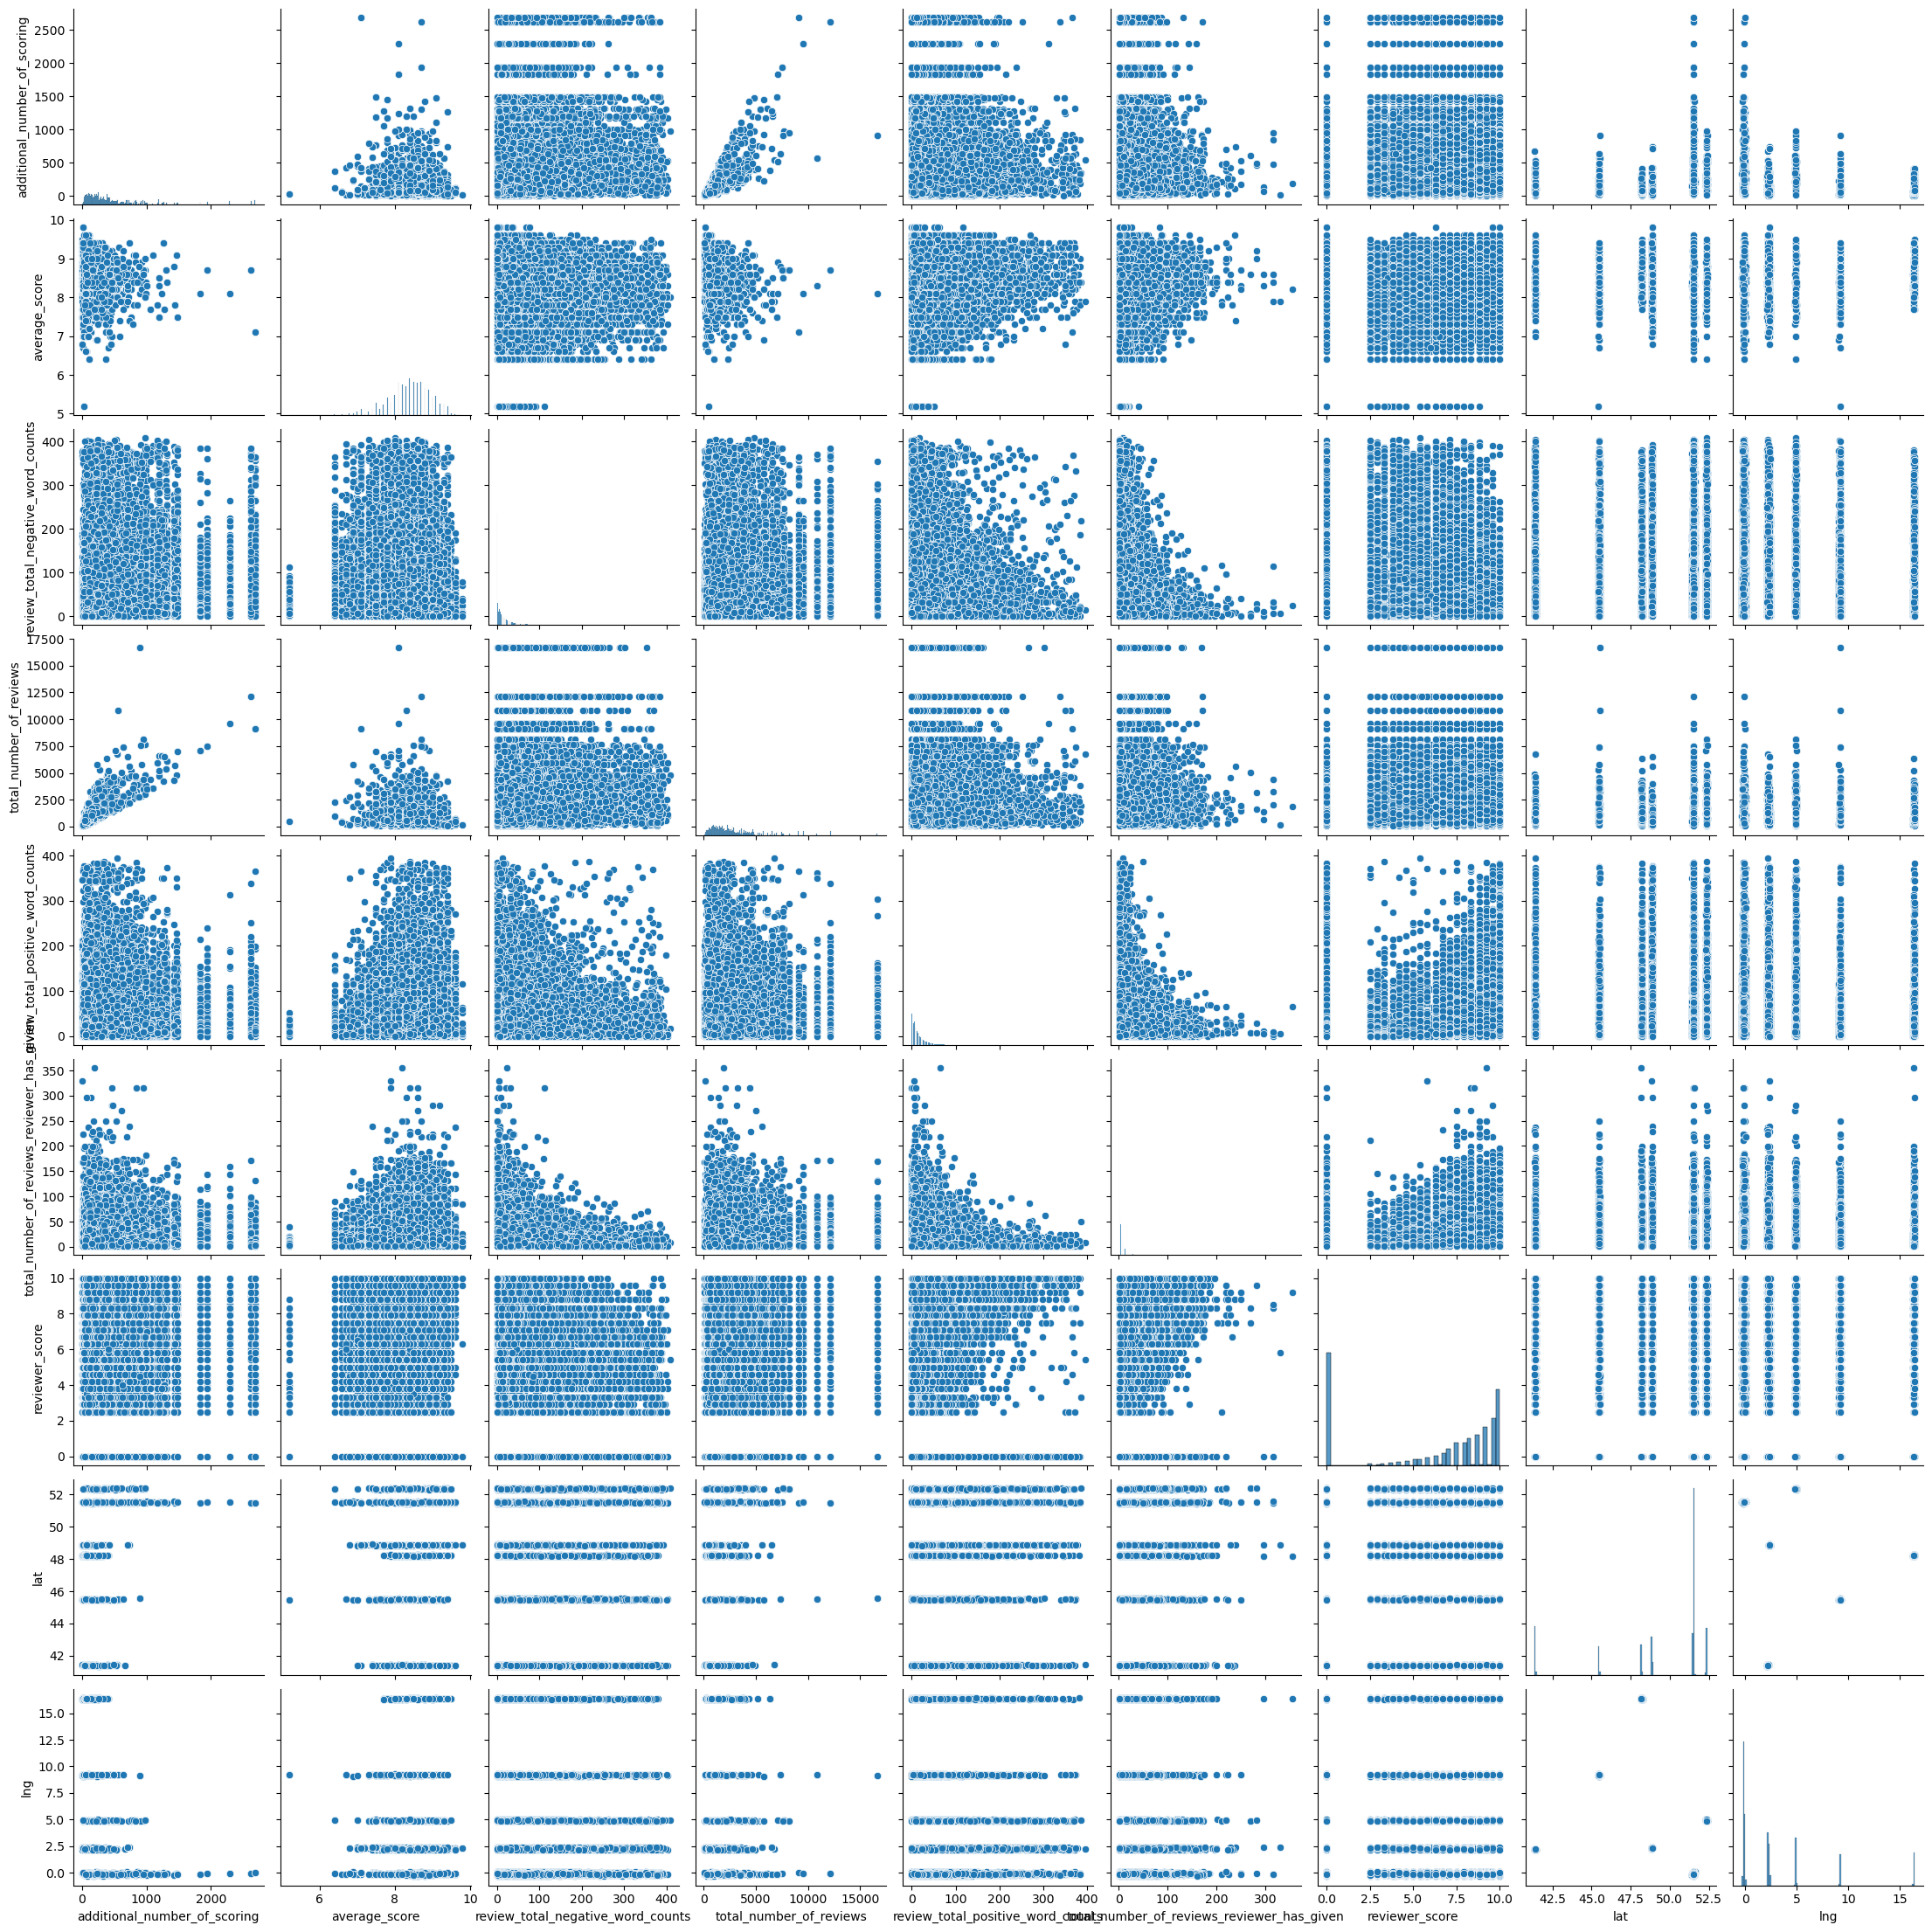

In [29]:
# формируем код и выводим график - pairplot для визуальной оценки распределения данных и возможной кореляции с целевым параметром reviewer_score
sns.pairplot(numerical_features_df.dropna())

Text(0.5, 1.0, 'Матрица первичной корреляции')

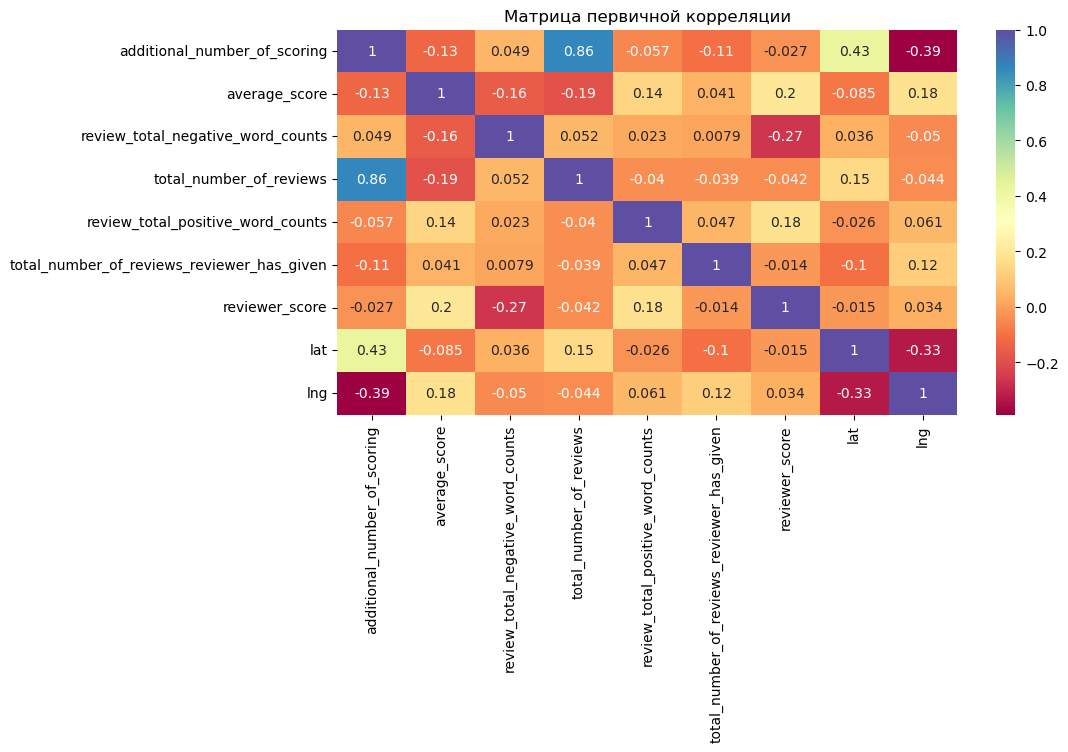

In [30]:
# формируем код и выводим график - heatmap c оценкой первичной кореляции числовых признаков
fid, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
sns.heatmap(data=numerical_features_df.corr(method='spearman'), annot=True, cmap='Spectral')
plt.title('Матрица первичной корреляции')

**Комментарии / выводы:**

1. Из графика видим, что признак "average_score" возможно имееет нормальное распределение, остальные отличны от нормального. Проверим распределение с помощью статистического теста Д'Агостино.    

In [31]:
# описываем функцию для проверки данных на нормальность  
def test_normality(data, alpha=0.05):
    """
    Проверка на нормальность данных методом Д'Агостино
    
    Параметры
    ----------
    data : array_like
        Набор данных для проверки на нормальность.
        
    alpha : float, по умолчанию 0.05
        Уровень значимости для проверки на нормальность.
        Если p-value меньше указанного уровня значимости,
        то гипотеза о нормальности отвергается.
    
    Возвращаемые значения
    ----------------------
    result :
        Результат проверки на нормальность. True если данные
        прошли тест на нормальность, False если не прошли.
    print : 
        Вывод на печать результата
    """
    H0 = 'Данные распределены нормально' # Нулевая гипотеза
    Ha = 'Данные распределены отлично от нормального (мы отвергаем H0)' # Альтернативная гипотеза
    stat, p = normaltest(data)
    result = p > alpha
    return print((Ha, H0) [ p > alpha])


In [32]:
# формируем код и выводим информацию о распределении данных в числовых признаках
for feature in numerical_features:
    print(f'Признак {feature}:') 
    test_normality(hotels_df[feature])

Признак additional_number_of_scoring:
Данные распределены отлично от нормального (мы отвергаем H0)
Признак average_score:
Данные распределены отлично от нормального (мы отвергаем H0)
Признак review_total_negative_word_counts:
Данные распределены отлично от нормального (мы отвергаем H0)
Признак total_number_of_reviews:
Данные распределены отлично от нормального (мы отвергаем H0)
Признак review_total_positive_word_counts:
Данные распределены отлично от нормального (мы отвергаем H0)
Признак total_number_of_reviews_reviewer_has_given:
Данные распределены отлично от нормального (мы отвергаем H0)
Признак reviewer_score:
Данные распределены отлично от нормального (мы отвергаем H0)
Признак lat:
Данные распределены отлично от нормального (мы отвергаем H0)
Признак lng:
Данные распределены отлично от нормального (мы отвергаем H0)


/var/folders/8c/t4hdh9954tg2trks19jq1b8m0000gn/T/ipykernel_28334/1615561361.py:28: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return print((Ha, H0) [ p > alpha])


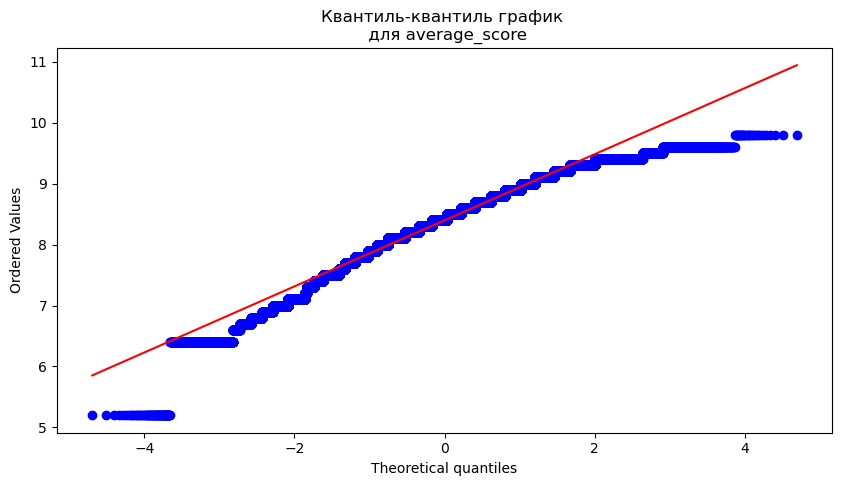

In [33]:
# формируем и выводим график квантиль-квантиль для average_score для визуальной оценки / проверки
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
stats.probplot(numerical_features_df.average_score, dist="norm", plot=ax)
plt.title('Квантиль-квантиль график \n для average_score')
plt.show()

**Комментарии / выводы:**

1. Согласно теста Д'Агостино данные во всех числовых категориях распределены отлично от нормального;
2. Так как данные распределены отлично от нормального, оценим наличие выбросов с помощью IsolationForest;
3. Так же сделаем оценку выбросов на основании метода межквартильных размахов (метода Тьюки) с увеличением интервалов.

In [34]:
# в связи с ограничением изменения выборки test разделим dataframe на 2 выборки и при очистке данных будем вносить изменения только в выборку train
cleaned = hotels_df[hotels_df['sample']==1].copy()
cleaned_0 = hotels_df[hotels_df['sample']==0].copy()
cleaned.shape

(386496, 18)

#### Оценка выбросов на основании алгоритма IsolationForest

**Конечный результат работы Isolation Forest зависит от следующий параметров:**

* contamination - определяет ожидаемую долю выбросов в данных. Например, если вы хотите обнаружить только 1% выбросов, вы можете установить значение contamination=0.01.
* n_estimators - количество деревьев в лесу. Увеличение количества деревьев позволяет повысить чувствительность алгоритма, но увеличивает время обучения и размер модели. Например, n_estimators=100.
* max_samples - максимальное количество выборок, которые будут использоваться в каждом дереве. Этот параметр может использоваться для ускорения обучения и снижения потребления памяти. Например, max_samples=1000.
* max_features - максимальное количество признаков, которые будут использоваться в каждом дереве. Этот параметр может использоваться для ускорения обучения и снижения потребления памяти. Например, max_features=10.
* bootstrap - определяет, будут ли выборки, используемые для обучения каждого дерева, выбираться с заменой (bootstrap=True) или без (bootstrap=False). Например, bootstrap=False.

```
def isolation_forest(df, features, contamination=0.01, n_estimators=100, max_samples="auto", max_features=1, boorstrap=False):
    for feature in features:
        iso_forest = IsolationForest(random_state=RANDOM_SEED, contamination=contamination, n_estimators=n_estimators, max_samples=max_samples, max_features=max_features, bootstrap=boorstrap)
        iso_forest.fit(df[[feature]])
        df[f"{feature}_anomaly"] = iso_forest.predict(df[[feature]])
        print(f"Number of anomalies detected in {feature}: {(df[f'{feature}_anomaly'] == -1).sum()}")
    
    anomalies = df[[f"{feature}_anomaly" for feature in features]]
    df = df.loc[anomalies.sum(axis=1) == 0]
    df = df.drop([f"{feature}_anomaly" for feature in features], axis=1)
    
    return df
```

```
features = ['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'reviewer_score']

cleaned_if = isolation_forest(cleaned, features)
```

#### Оценка выбросов на основании метода межквартильных размахов (метода Тьюки)

In [35]:
# описываем функцию для поиска выбросов на основании метода межквартильных размахов (метода Тьюки)
def outliers_iqr_mod_log(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:    
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned


In [36]:
# производим оценку выбросов увеличив границы так как данные распределены отлично от нормального
for feature in numerical_features:
    outliers, cleaned = outliers_iqr_mod_log(cleaned, feature, left=3, right=3, log_scale=False)
    print(f'Число выбросов по методу Тьюки в признаке "{feature}": {outliers.shape[0]}')
    print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки в признаке "additional_number_of_scoring": 9888
Результирующее число записей: 376608
Число выбросов по методу Тьюки в признаке "average_score": 44
Результирующее число записей: 376564
Число выбросов по методу Тьюки в признаке "review_total_negative_word_counts": 11654
Результирующее число записей: 364643
Число выбросов по методу Тьюки в признаке "total_number_of_reviews": 2124
Результирующее число записей: 362519
Число выбросов по методу Тьюки в признаке "review_total_positive_word_counts": 8638
Результирующее число записей: 353566
Число выбросов по методу Тьюки в признаке "total_number_of_reviews_reviewer_has_given": 14250
Результирующее число записей: 338290
Число выбросов по методу Тьюки в признаке "reviewer_score": 0
Результирующее число записей: 338290
Число выбросов по методу Тьюки в признаке "lat": 0
Результирующее число записей: 338290
Число выбросов по методу Тьюки в признаке "lng": 0
Результирующее число записей: 338290


In [37]:
# формируем обновленный dataframe после очистки данных
hotels_df = pd.concat([cleaned, cleaned_0], ignore_index=True)
# выводим размерность обновленного dataframe
display(hotels_df.shape)
# display(hotels_df.query('sample == 0').shape[0]) # проверка размерности test

(467225, 18)

## 4. Exploratory Data Analysis-EDA(Разведывательный анализ данных)

### 4.1 Feature Engineering (Проектирование признаков)

#### 4.1.1 Создание признаков из существующего набора данных

In [38]:
# формируем код и выведем информацию по dataframe
display(hotels_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467225 entries, 0 to 467224
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   hotel_address                               467225 non-null  object  
 1   additional_number_of_scoring                467225 non-null  int64   
 2   review_date                                 467225 non-null  object  
 3   average_score                               467225 non-null  float64 
 4   hotel_name                                  467225 non-null  object  
 5   reviewer_nationality                        467225 non-null  object  
 6   negative_review                             467225 non-null  object  
 7   review_total_negative_word_counts           467225 non-null  int64   
 8   total_number_of_reviews                     467225 non-null  int64   
 9   positive_review                             467225 non-null

None

#### **4.1.1.1 Разбор даты и времени**

#### **Признак "review_date"**

In [39]:
# формируем и выводим первичную информацию о признаке
display(hotels_df['review_date'].head(3))

0     2/19/2016
1     1/12/2017
2    10/18/2016
Name: review_date, dtype: object

Признак имеет тип данных object, но по факту данные представлены датой. Изменим тип данных на datetime и выделим новые признаки - год, месяц, день, квартал, неделя и день недели оценки. В последующем в зависимости от влияния на целевой показатель данные показатели будут скорректированы.

In [40]:
# формируем код и производим изменение типа данных признака review_date
hotels_df['review_date'] = pd.to_datetime(hotels_df['review_date'], format='%m/%d/%Y')

In [41]:
# формируем код и создаем новые признаки: год, месяц, день, квартал, неделя и день недели оценки
hotels_df['review_year'] = hotels_df['review_date'].dt.year
hotels_df['review_month'] = hotels_df['review_date'].dt.month
hotels_df['review_day'] = hotels_df['review_date'].dt.day
hotels_df['week'] = hotels_df['review_date'].dt.week 
hotels_df['quarter'] = hotels_df['review_date'].dt.quarter
hotels_df['dayofweek'] = hotels_df['review_date'].dt.dayofweek

# удалим колонку review_date
#hotels_df = hotels_df.drop(columns=['review_date'], axis=1)
#display(hotels_df.info())

/var/folders/8c/t4hdh9954tg2trks19jq1b8m0000gn/T/ipykernel_28334/2991693344.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  hotels_df['week'] = hotels_df['review_date'].dt.week


#### **4.1.1.2 Разбор числовых признаков**

In [42]:
# формируем код и выведем информацию о числовых признаках в dataframe
hotels_numerical = hotels_df.select_dtypes(include='number')
display(hotels_numerical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467225 entries, 0 to 467224
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                467225 non-null  int64  
 1   average_score                               467225 non-null  float64
 2   review_total_negative_word_counts           467225 non-null  int64  
 3   total_number_of_reviews                     467225 non-null  int64  
 4   review_total_positive_word_counts           467225 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  467225 non-null  int64  
 6   reviewer_score                              467225 non-null  float64
 7   lat                                         467225 non-null  float64
 8   lng                                         467225 non-null  float64
 9   review_year                                 467225 non-null  int64  
 

None

In [43]:
display(hotels_numerical)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng,review_year,review_month,review_day,week,quarter,dayofweek
0,581,8.4,3,1994,4,7,10.0,51.507894,-0.143671,2016,2,19,7,1,4
1,299,8.3,3,1361,2,14,6.3,51.521009,-0.123097,2017,1,12,2,1,3
2,32,8.9,6,406,0,14,7.5,48.845377,2.325643,2016,10,18,42,4,1
3,34,7.5,0,607,11,8,10.0,48.888697,2.394540,2015,9,22,39,3,1
4,914,8.5,4,7586,20,10,9.6,52.385601,4.847060,2016,3,5,9,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467220,53,8.1,0,984,4,14,0.0,45.502453,9.221836,2016,2,3,5,1,2
467221,46,7.8,0,523,24,1,0.0,41.378169,2.178663,2016,6,18,24,2,5
467222,260,8.0,31,3461,23,1,0.0,48.193523,16.366915,2017,7,6,27,3,3
467223,159,9.0,0,1053,20,7,0.0,45.468236,9.207380,2015,12,26,52,4,5


In [44]:
display(hotels_numerical.describe())

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng,review_year,review_month,review_day,week,quarter,dayofweek
count,467225.000000,467225.000000,467225.000000,467225.000000,467225.000000,467225.000000,467225.000000,467225.000000,467225.000000,467225.000000,467225.000000,467225.000000,467225.000000,467225.000000,467225.000000
mean,461.317644,8.407035,15.514118,2554.907201,15.912933,5.891299,6.125671,49.430578,2.874991,2016.117314,6.495864,15.686661,26.665803,2.506553,2.722018
std,419.290837,0.541463,21.439768,1931.658021,16.690790,7.652477,4.016031,3.474388,4.652986,0.687234,3.352985,8.863760,14.734792,1.089033,2.085106
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,41.328376,-0.369758,2015.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,167.000000,8.100000,0.000000,1140.000000,5.000000,1.000000,0.000000,48.214277,-0.144947,2016.000000,4.000000,8.000000,14.000000,2.000000,1.000000
50%,335.000000,8.400000,8.000000,2061.000000,11.000000,3.000000,7.900000,51.499749,0.025322,2016.000000,7.000000,16.000000,27.000000,3.000000,2.000000
75%,634.000000,8.800000,22.000000,3510.000000,21.000000,8.000000,9.600000,51.516689,4.834443,2017.000000,9.000000,23.000000,39.000000,3.000000,5.000000
max,2682.000000,9.800000,402.000000,16670.000000,383.000000,315.000000,10.000000,52.400181,16.429233,2017.000000,12.000000,31.000000,53.000000,4.000000,6.000000


**Комментарии / выводы:**

1. На текущем этапе количество признаков представленных числовыми данными составляет - 15. Признаки представлены 2 типами - int64(11), float64(4);
2. Данные представленные типом float64 - "Средняя оценка" и "Оценка рецензента" округлять не стоит, так как это может повлиять на результат; "Широта и долгота" - возможно округлить до целых.

In [45]:
# формируем код и производим округление признаков lat и lng
hotels_df['lat'] = hotels_df['lat'].round(0).astype('int64')
hotels_df['lng'] = hotels_df['lng'].round(0).astype('int64')
#display(hotels_df.info())

#### **4.1.1.3 Разбор текста**

In [46]:
# формируем код и выводим информацию о признаках имеющих тип object
hotels_object = hotels_df.select_dtypes(include='object')
display(hotels_object.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467225 entries, 0 to 467224
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   hotel_address         467225 non-null  object
 1   hotel_name            467225 non-null  object
 2   reviewer_nationality  467225 non-null  object
 3   negative_review       467225 non-null  object
 4   positive_review       467225 non-null  object
 5   tags                  467225 non-null  object
 6   days_since_review     467225 non-null  object
dtypes: object(7)
memory usage: 25.0+ MB


None

In [47]:
display(hotels_object)

,hotel_address,hotel_name,reviewer_nationality,negative_review,positive_review,tags,days_since_review
0,Stratton Street Mayfair Westminster Borough Lo...,The May Fair Hotel,United Kingdom,Leaving,Staff were amazing,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day
1,130 134 Southampton Row Camden London WC1B 5AF...,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,location,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day
2,151 bis Rue de Rennes 6th arr 75006 Paris France,Legend Saint Germain by Elegancia,China,No kettle in room,No Positive,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,Friendly staff quiet comfortable room spotles...,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day
4,Molenwerf 1 1014 AG Amsterdam Netherlands,Golden Tulip Amsterdam West,Poland,Torn sheets,The staff was very friendly and helpful Break...,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day
...,...,...,...,...,...,...,...
467220,Viale Monza 132 Distretto Viale Monza 20127 Mi...,Best Western Antares Hotel Concorde,Greece,No Negative,nice breakfast,"[' Business trip ', ' Couple ', ' Double Room ...",547 day
467221,Duc De Medinaceli 8 Ciutat Vella 08002 Barcelo...,Medinaceli,United States of America,No Negative,Beautiful historic hotel in great location in...,"[' Leisure trip ', ' Couple ', ' Double Room '...",411 day
467222,Wiedner Hauptstra e 44 04 Wieden 1040 Vienna A...,Suite Hotel 900 m zur Oper,New Zealand,No coffee in complimentary coffee in the room...,The size of the room the courtyard and the lo...,"[' Business trip ', ' Solo traveler ', ' Singl...",28 days
467223,Corso Concordia 1 Milan City Center 20129 Mila...,Ch teau Monfort Relais Ch teaux,Australia,No Negative,Staff very polite and helpful Hotel well loca...,"[' Leisure trip ', ' Solo traveler ', ' Execut...",586 day


In [48]:
display(hotels_object.describe(include='object'))

,hotel_address,hotel_name,reviewer_nationality,negative_review,positive_review,tags,days_since_review
count,467225,467225,467225,467225,467225,467225,467225
unique,1493,1492,226,294731,372940,52235,731
top,Scarsdale Place Kensington Kensington and Chel...,Copthorne Tara Hotel London Kensington,United Kingdom,No Negative,No Positive,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days
freq,3396,3396,224521,119352,32909,4751,2347


**Комментарии / выводы:**

1. Тип object имеют 7 признаков, все данные представлены строками.

#### **Признак "days_since_review"**

In [49]:
# формируем код и выводим информацию
display(hotels_df['days_since_review'].iloc[0:56879:5000].tolist())


['531 day',
 '452 day',
 '518 day',
 '375 day',
 '575 day',
 '227 day',
 '693 day',
 '235 day',
 '269 day',
 '44 days',
 '245 day',
 '604 day']

Признак содержит информацию в цифровом виде, что позволяет выделить число и перевести в числовой тип данных.

In [50]:
# формируем код и производим очистку данных со сменой типа данных
hotels_df['days_since_review'] = hotels_df['days_since_review'].apply(lambda x: ''.join(filter(str.isdigit, x))).astype('int64')
#hotels_df['days_since_review'].info()

#### **Признак "reviewer_nationality"**


In [51]:
# формируем код и выводим информацию
display(hotels_df['reviewer_nationality'].iloc[10000:100000:10000])
display(hotels_df['reviewer_nationality'].value_counts()) # сортируем по количеству
display(f'Количество уникальных значений: {hotels_df.reviewer_nationality.nunique()}')

10000              Egypt 
20000     United Kingdom 
30000     United Kingdom 
40000     United Kingdom 
50000     United Kingdom 
60000     United Kingdom 
70000     United Kingdom 
80000            Belgium 
90000     United Kingdom 
Name: reviewer_nationality, dtype: object

 United Kingdom               224521
 United States of America      32317
 Australia                     19698
 Ireland                       13608
 United Arab Emirates           9363
                               ...  
 Svalbard Jan Mayen                1
 Guinea                            1
 Comoros                           1
 Anguilla                          1
 Cape Verde                        1
Name: reviewer_nationality, Length: 226, dtype: int64

'Количество уникальных значений: 226'

**Комментарии / выводы:**

1. Признак содержит инфорацию о национальности рецензента, выражен в виде наименования страны. Количество уникальных значений - 226; 
2. Так как количество уникальных значений большое, предлагается произвести кодировку данного признака с помощью метода "Бинарного кодирования".

In [52]:
# формируем код и производим кодировку признака reviewer_nationality
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels_df['reviewer_nationality'])
hotels_df = pd.concat([hotels_df, type_bin], axis=1)

#### **Признак "hotel_address"**

In [53]:
# формируем код и выводим информацию
display(hotels_df['hotel_address'].iloc[155])
display(hotels_df['hotel_address'].iloc[250369])
display(hotels_df['hotel_address'].iloc[365369])

'Oosterdoksstraat 4 Amsterdam City Center 1011 DK Amsterdam Netherlands'

'South Quay Marsh Wall Tower Hamlets London E14 9SH United Kingdom'

'Euston Road Camden London NW1 2AR United Kingdom'

**Комментарии / выводы:**

1. Признак hotel_address содежит информацию об адресе (улица и т.д.), номере, городе и стране, что позволяет нам выделить новые признаки - страна и город расположения отеля; 
2. При этом следует обратить внимание на то, что наименование страны распологается в строчке на позиции [-1], города [-2], за исключение United Kindom - страна состоит из 2 слов а город распологается на позиции [-5].

In [54]:
# формируем код функции для выделения страны из адреса
def get_country_hotell(arg):
    list = arg.split(" ")
    return list[-1]

# формируем код функции для выделения города из адреса
def get_city_hotell(arg):
    list = arg.split(" ")
    if list[-1] != 'Kingdom':
        return list[-2]
    else:
        return list[-5]

In [55]:
# создадим новый признак hotel_country - страна расположения отеля
hotels_df['hotel_country'] = hotels_df['hotel_address'].apply(get_country_hotell)
# создадим новый признак hotel_city - город расположения отеля
hotels_df['hotel_city'] = hotels_df['hotel_address'].apply(get_city_hotell)

In [56]:
# заменим название страны Kingdom на United Kingdom и выведем информацию о количестве записей в разрезе стран
hotels_df['hotel_country'] = hotels_df['hotel_country'].replace({'Kingdom':'United Kingdom'})
display(hotels_df['hotel_country'].value_counts())

United Kingdom    236877
Spain              55568
France             54934
Netherlands        52670
Austria            35336
Italy              31840
Name: hotel_country, dtype: int64

In [57]:
# выведем информацию о количестве записей в разрезе городов
display(hotels_df['hotel_city'].value_counts())

London       236877
Barcelona     55568
Paris         54934
Amsterdam     52670
Vienna        35336
Milan         31840
Name: hotel_city, dtype: int64

**Комментарии / выводы:**

Из анализа созданных новых признаков мы видим, что отели распологаются в 6 странах и в 6 крупных городах - туристических центрах. Количественные данные совпадают. Для построения модели ML предлагается произвести кодировку по методу однократного кодирования OneHot.

In [58]:
# производим кодировку признака hotel_country
encoder = ce.OneHotEncoder(cols=['hotel_country'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(hotels_df['hotel_country'])
hotels_df = pd.concat([hotels_df, type_bin], axis=1)
#display(hotels_df.info())

In [59]:
# производим кодировку признака hotel_city
encoder = ce.OneHotEncoder(cols=['hotel_city'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(hotels_df['hotel_city'])
hotels_df = pd.concat([hotels_df, type_bin], axis=1)
#display(hotels_df.info())

#### **Признак "tags"**

In [60]:
# формируем код и выводим информацию о структуре
display(hotels_df['tags'].iloc[500])
display(hotels_df['tags'].iloc[12000])
display(hotels_df['tags'].iloc[350000])

"[' Leisure trip ', ' Couple ', ' Standard Double or Twin Room ', ' Stayed 1 night ']"

"[' Business trip ', ' Solo traveler ', ' Small Double Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']"

"[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 4 nights ', ' Submitted from a mobile device ']"

**Комментарии / выводы:**

Из информации мы види, что данные представлены в виде строки и дополнительных символов. Произведем очистку данных.

In [61]:
# формируем код функции для очистки tags
def get_change_tags(args):
    new_list = []
    clean = args.replace("'", "").replace("[","").replace("]","").split(",")
    for i in clean:
        j = i.strip()
        new_list.append(j)

    return new_list

In [62]:
# формируем код и производим очистку данных и выводим информацию о количестве уникальных тегов
hotels_df['tags'] = hotels_df['tags'].apply(get_change_tags)
display(f'Уникальное количество тегов составляет {(hotels_df.tags.explode().nunique())}')

'Уникальное количество тегов составляет 2403'

In [63]:
# формируем код и выводим количественные данные использования тегов - 10 первых позиций
hotels_df['tags'].explode().value_counts().head(10)

Leisure trip                      380675
Submitted from a mobile device    284420
Couple                            229895
Stayed 1 night                    174994
Stayed 2 nights                   121315
Solo traveler                      95881
Stayed 3 nights                    87179
Business trip                      72912
Group                              60005
Family with young children         55335
Name: tags, dtype: int64

In [64]:
# формируем код функции для кодирования признака tegs

def encode_top_features(df, feature_column, num_features=5):
    """
    Функция, которая преобразовывает признак с текстовыми значениями в бинарные признаки.
    
    Параметры:
    -----------
    df : pandas DataFrame с категориальным типом данных (строка)

    feature_column : наименование столбца, который преобразовывается и в последующем кодируется
    
    num_features : количество наиболее часто встречающихся позиций в данном признаке, 
    которые будут закодированы (int), по умолчанию установлено - 2.
    
    Returns:
    --------
    pandas DataFrame
        объединенный DataFrame c новыми закодированными признаками    
    """
    
    # подсчитываем частоту каждого признака
    freq = Counter([item for sublist in df[feature_column] for item in sublist])
    # выбираем num_features наиболее встречающихся признака
    most_common = freq.most_common(num_features)
    labels_to_encode = [mc[0] for mc in most_common]
    # декодируем каждый признак в набор бинарных значений
    encoded_cols = pd.get_dummies(df[feature_column].apply(pd.Series).stack()).sum(level=0)
    # оставляем только столбцы с выбранными признаками
    result_df = encoded_cols[labels_to_encode]
    # объединяем исходный DataFrame и закодированные признаки
    result_df = pd.concat([df, result_df], axis=1)
    
    return result_df


In [65]:
# формируем код и производим преобразование tags, формируя 20 новых бинарных признаков
hotels_df = encode_top_features(hotels_df, 'tags', num_features=20)

/var/folders/8c/t4hdh9954tg2trks19jq1b8m0000gn/T/ipykernel_28334/3189850431.py:28: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  encoded_cols = pd.get_dummies(df[feature_column].apply(pd.Series).stack()).sum(level=0)


In [66]:
# формируем код и выводим информацию по результатам преобразования
display(hotels_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467225 entries, 0 to 467224
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               467225 non-null  object        
 1   additional_number_of_scoring                467225 non-null  int64         
 2   review_date                                 467225 non-null  datetime64[ns]
 3   average_score                               467225 non-null  float64       
 4   hotel_name                                  467225 non-null  object        
 5   reviewer_nationality                        467225 non-null  object        
 6   negative_review                             467225 non-null  object        
 7   review_total_negative_word_counts           467225 non-null  int64         
 8   total_number_of_reviews                     467225 non-null  int64        

None

In [67]:
# нижележащие 3 ячейки для notebook на kaggle - замена функции
# формируем код и вывоводим лист 20 первых тегов
#tags_list = hotels_df['tags'].explode().value_counts().head(20).index.tolist()
#display(tags_list)

In [68]:
# формируем код функции которая создает новые признаки из признаков tags
#def add_tags(df, list):
#    for review in list:
#        col_name = "tags_" + review.lower()
#        df[col_name] = df['tags'].apply(lambda x: 1 if review in x else 0)
#    return df

In [69]:
# формируем код и производим создание бинарных признаков из tags
#hotels_df = add_tags(hotels_df, tags_list)
#hotels_df.info()

#### **Признак "negative_review"**

In [70]:
# формируем код и выводим информацию о структуре данных в признаке "negative_review"
display(hotels_df['negative_review'].iloc[0])
display(hotels_df['negative_review'].iloc[50])
display(hotels_df['negative_review'].iloc[100])

' Leaving '

' Windows did not open they said due to health and safety but it s made the room stuffy AC was there but made no difference Hot water was Luke warm all the time we was there '

' Room dark bed comfy but not made we ll Air con faulty had to move rooms at 12 midnight'

In [71]:
# формируем код и выводим информацию о количестве использования тегов в негативных отзывах
hotels_df['negative_review'] = hotels_df['negative_review'].apply(lambda x: x.lower())
hotels_df['negative_review'].explode().value_counts().iloc[0:10]

no negative    119352
 nothing        15472
 nothing         4130
 n a             1671
 none            1221
                  765
 breakfast        473
 small room       459
 location         418
 all good         362
Name: negative_review, dtype: int64

In [72]:
# формируем список наиболее встречающихся тегов (в ручном режиме)
negative_list = ['no negative', 'nothing', 'none', 'location', 'staff', 'breakfast', 'everything', 'n a', 'room', 'price', 'expensive', 'parking', 'bathroom', 'gym', 'bed']

#### **Признак "positive_review"**

In [73]:
# формируем код и выводим информацию о структуре данных в признаке "positive_review"
display(hotels_df['positive_review'].iloc[650])
display(hotels_df['positive_review'].iloc[256897])
display(hotels_df['positive_review'].iloc[309341])

'No Positive'

' Bed was very comfy Good size room Excellent choice at breakfast'

' Good location Close to La Rambla Catalonia Plaza restaurants bus tour metro '

In [74]:
hotels_df['positive_review'] = hotels_df['positive_review'].apply(lambda x: x.lower())
hotels_df['positive_review'].explode().value_counts().iloc[0:10]

no positive        32909
 location           9991
 everything         2492
 nothing            1277
 the location       1264
 great location     1178
 good location      1089
 location            880
 breakfast           668
 everything          645
Name: positive_review, dtype: int64

In [75]:
# формируем список наиболее встречающихся тегов (в ручном режиме)
positive_list = ['no positive', 'nothing', 'location', 'staff', 'breakfast', 'everything', 'service', 'bed', 'room', 'all', 'clean', 'cleanliness', 'view', 'price', 'spa']

In [76]:
# формируем код функции которая создает новые признаки из признаков negative_review и positive_review и присваивает им бинарные значения
def add_review_features(df, negative_list, positive_list):
    for review in negative_list:
        col_name = "negative_" + review.lower()
        df[col_name] = df['negative_review'].apply(lambda x: 1 if review in x.lower() else 0)
    for review in positive_list:
        col_name = "positive_" + review.lower()
        df[col_name] = df['positive_review'].apply(lambda x: 1 if review in x.lower() else 0)
    return df


In [77]:
# формируем код и производим создание бинарных признаков из negative_review и positive_review
hotels_df = add_review_features(hotels_df, negative_list ,positive_list)
#hotels_df.info()

#### Произведем анализ тональности отзывов в признаках "negative_review" и "positive_review" c помощью библиотеки nltk (бонус от ментора!!!)

In [78]:
nltk.downloader.download('vader_lexicon')
sent_analyzer = SentimentIntensityAnalyzer()

sent_keys = ['neg', 'neu', 'pos', 'compound']
for key in sent_keys:
    hotels_df['pos_rev_'+key] = 0
    hotels_df['neg_rev_'+key] = 0

def get_pos_sentiments(row):
    sent_pos_dict = sent_analyzer.polarity_scores(row['positive_review'])
    sent_neg_dict = sent_analyzer.polarity_scores(row['negative_review'])
    for key in sent_keys:
        row['pos_rev_' + key] = sent_pos_dict[key]
        row['neg_rev_' + key] = sent_neg_dict[key]
    return row

hotels_df = hotels_df.apply(get_pos_sentiments, axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alexander.v.varlamov/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### 4.1.2 Создание признаков с помощью внешних источников

**Создадим новые признаки используя открытые данные по странам и городам**

1. Рейтинг population - численность начеления страны где находится отель;
2. Рейтинг rating_city - рейтинг [городов европы](https://mabrian.com/blog/best-value-money-destinations/) для путешествий.

In [79]:
# формируем данные (словари) в ручном режиме используя информацию из открытых источников
population = {'United Kingdom':67_108_596, 'Spain':47_394_223, 'France':67_413_000, 'Netherlands':17_630_800, 'Austria':8_979_894, 'Italy':59_236_213}
rating_city = {'Zagreb':1, 'Athens':2, 'Ljubljana':3, 'Rome':4, 'Vienna':5, 'Lisbon':6, 'Madrid':7, 'Milan':8, 'Dubrovnik':9, 'Berlin':10, 'Amsterdam':11, 'Paris':12, 'Barcelona':13, 'London':14}

In [80]:
# формируем код и создаем новые признаки population и rating_city
hotels_df['population'] = hotels_df['hotel_country'].apply(lambda x: population[x])
hotels_df['rating_city'] = hotels_df['hotel_city'].apply(lambda x: rating_city[x])

/var/folders/8c/t4hdh9954tg2trks19jq1b8m0000gn/T/ipykernel_28334/3991562473.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hotels_df['population'] = hotels_df['hotel_country'].apply(lambda x: population[x])
/var/folders/8c/t4hdh9954tg2trks19jq1b8m0000gn/T/ipykernel_28334/3991562473.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hotels_df['rating_city'] = hotels_df['hotel_city'].apply(lambda x: rating_city[x])


#### 4.1.3 Преобразование признаков

1. Так как у нас числовые признаки распределены отлично от нормального то проведем **нормализацию** части признаков;
2. Нормализацию будем проводить с помощью метода MinMaxScaler;
3. Нормализации подвергнем числовые признаки, которые не подтвергались изменениям и дополнительно выделенные "days_since_review" и созданные "population" и "rating_city".

In [81]:
# формируем код и создаем копию dataframe перед нормализацией
hotels_scaler = hotels_df.copy()

In [82]:
from sklearn.preprocessing import MinMaxScaler

# выберем признаки, которые нужно нормализовать
selected_features = ['review_total_negative_word_counts', 
           'review_total_positive_word_counts', 
           'total_number_of_reviews_reviewer_has_given', 
           'total_number_of_reviews', 'additional_number_of_scoring', 'days_since_review', 'population', 'rating_city']

# инициализируем нормализатор MinMaxScaler
mm_scaler =  MinMaxScaler()

# вычисляем среднее и стандартное отклонение для всех выбранных признаков
mm_scaler.fit(hotels_scaler[selected_features])

# применяем стандартизацию ко всем выбранным признакам в df
hotels_scaler[selected_features] = mm_scaler.transform(hotels_scaler[selected_features])


#### 4.1.4 Отбор признаков(Мультиколлениарность)

In [83]:
# формируем код и создаем копию dataframe перед нормализацией
hotels_corr = hotels_scaler.copy()

**Отбор признаков** — процесс выбора важных признаков, наиболее влияющих на предсказание.

In [84]:
# формируем код функции вывода признаков с высокой кореляцией
def get_high_correlation(df, threshold=0.7):
    corr = df.corr().abs()
    high_corr = (corr[(corr > threshold) & (corr != 1)]
                      .stack()
                      .reset_index()
                      .rename(columns={0: 'correlation', 'level_0': 'feature_1', 'level_1': 'feature_2'}))
    high_corr = high_corr[high_corr['feature_1'] != high_corr['feature_2']].sort_values(by='correlation', ascending=False)
                      
    return high_corr

In [85]:
# формируем код и выводим данные о степени кореляции признаков
high_corr = get_high_correlation(hotels_corr)
display(high_corr)

/var/folders/8c/t4hdh9954tg2trks19jq1b8m0000gn/T/ipykernel_28334/44116163.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()


,feature_1,feature_2,correlation
9,lng,rating_city,0.991445
40,rating_city,lng,0.991445
16,quarter,review_month,0.969892
13,review_month,quarter,0.969892
14,week,review_month,0.961020
12,review_month,week,0.961020
30,neg_rev_neg,negative_no negative,0.947897
26,negative_no negative,neg_rev_neg,0.947897
35,neg_rev_neu,neg_rev_neg,0.944789
31,neg_rev_neg,neg_rev_neu,0.944789


In [86]:
# формируем код и удаляем признаки с высокой корреляцией
hotels_corr = hotels_corr.drop(columns=[
                                    'lng',
                                    'lat', 
                                    'rating_city',
                                    'review_month', 
                                    #'hotel_city_Vienna', 
                                    #'hotel_country_Austria',
                                    'days_since_review',
                                    'Leisure trip', 
                                    #'hotel_city_Vienna',
                                    #'hotel_country_Austria',
                                    'quarter',
                                    'neg_rev_neg',
                                    'pos_rev_neu',
                                    'positive_no positive',
                                    #'total_number_of_reviews',
                                    'additional_number_of_scoring',
                                    'population',
                                    'negative_no negative',
                                    ], axis=1)

### 4.2 Feature Selection (Отбор признаков)

In [87]:
# формируем код и создаем копию dataframe перед нормализацией
hotels_selection = hotels_corr.copy()

In [88]:
#формируем код и выводим список признаков с типом данных "object"
object_columns = [s for s in hotels_selection.columns if hotels_selection[s].dtypes == 'object']
object_columns

['hotel_address',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'positive_review',
 'tags',
 'hotel_country',
 'hotel_city']

In [89]:
# формируем код и удаляем признаки object и datetame
hotels_selection = hotels_selection.drop(columns=object_columns, axis=1)
hotels_selection = hotels_selection.drop(columns='review_date', axis=1)

<AxesSubplot: >

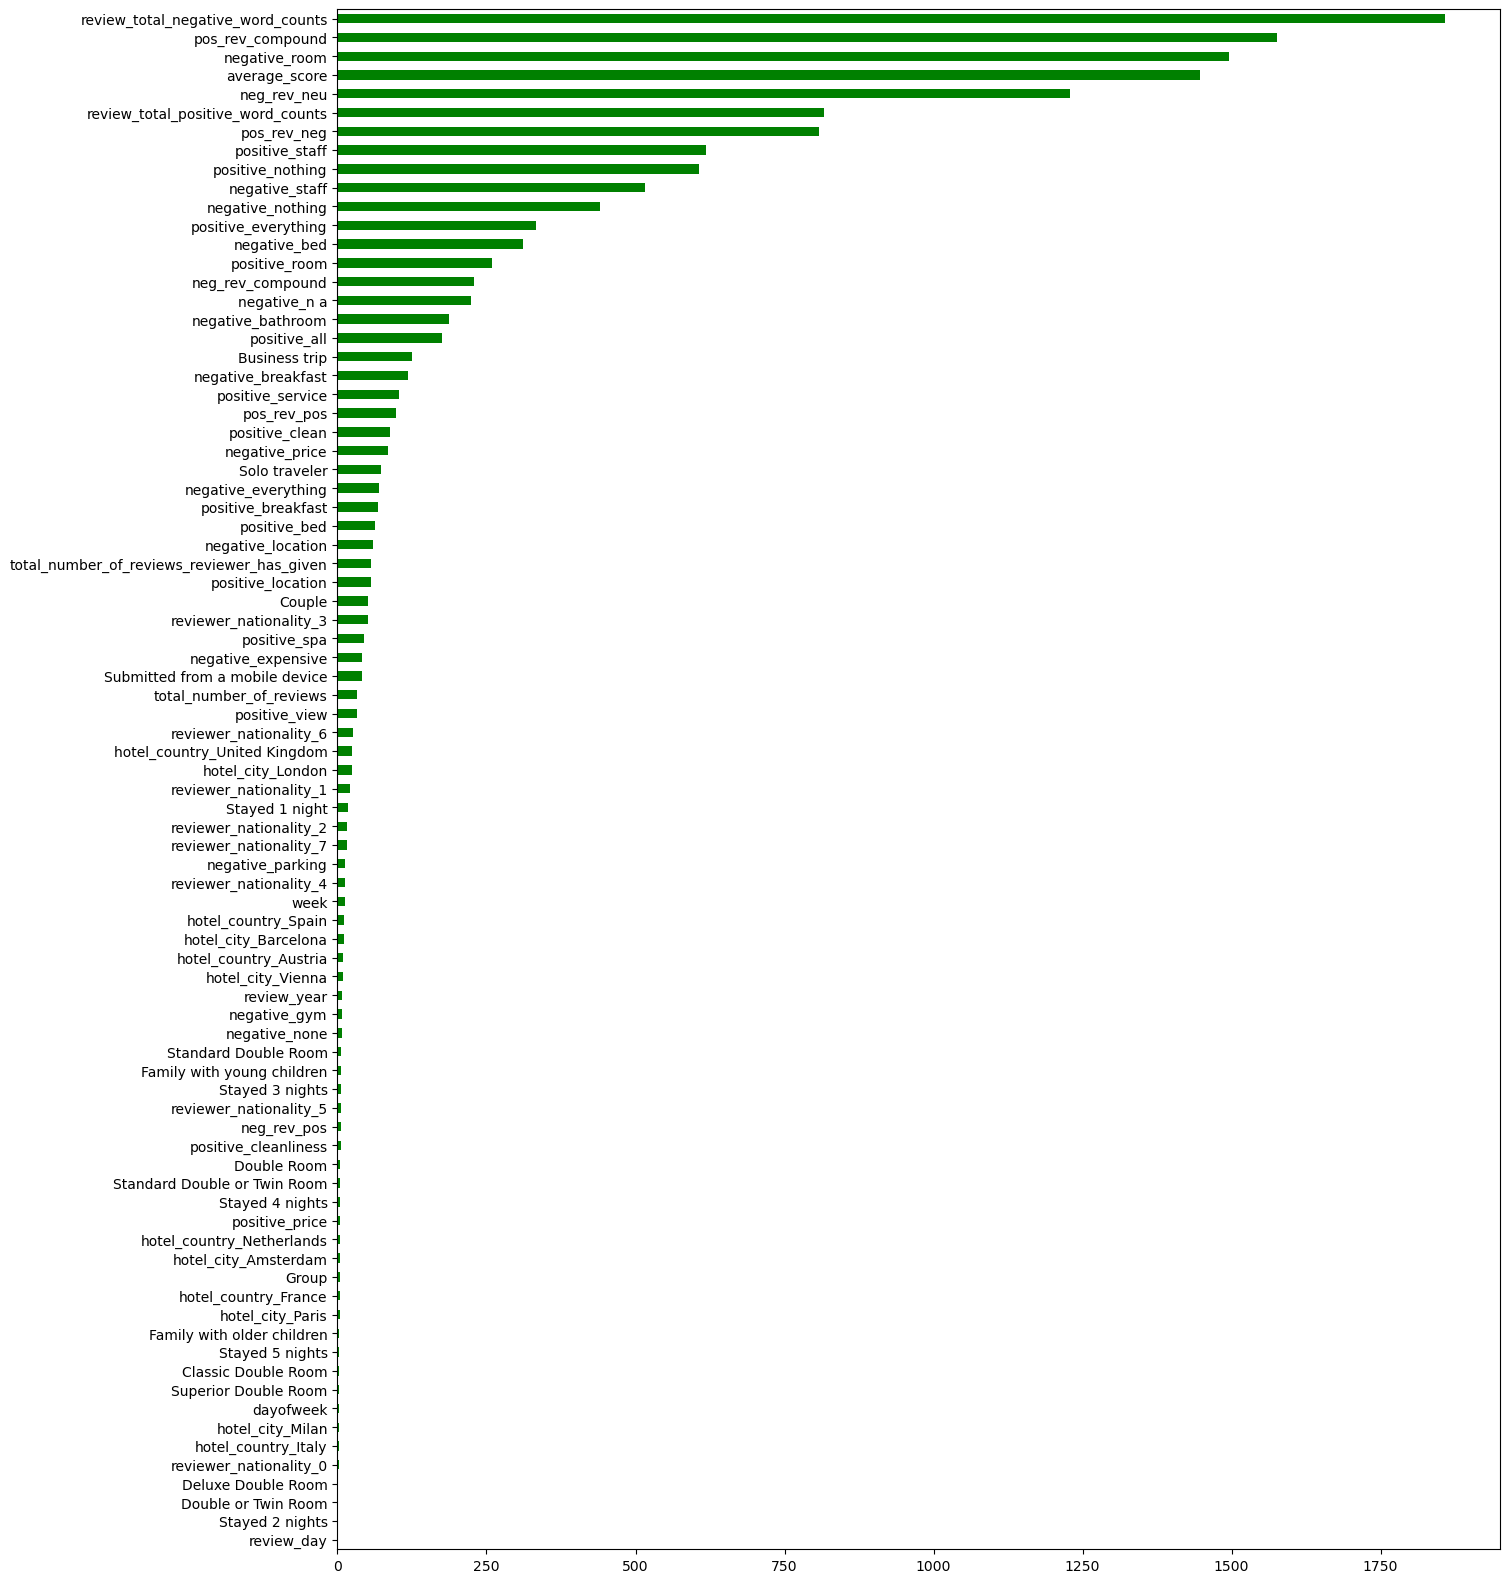

In [90]:
from sklearn.feature_selection import f_classif

y = hotels_selection.query('sample == 1').drop(['sample'], axis=1).reviewer_score.values
X = hotels_selection.query('sample == 1').drop(['sample', 'reviewer_score'], axis=1)

# визуализируем результат анализа значимости:
imp_num = pd.Series(f_classif(X[X.columns], y)[0], index = X.columns)
imp_num.sort_values(inplace = True)

fig5, ax5 = plt.subplots(figsize=(15, 20))
imp_num.plot(kind = 'barh', color='green')

In [91]:
# формируем код и удаляем признаки не влияющие на модель
hotels_selection = hotels_selection.drop(columns=[
                                    'review_day',
                                    'Stayed 2 nights',
                                    'Double or Twin Room',
                                    'Deluxe Double Room',
                                    'reviewer_nationality_0',
                                    'hotel_city_Milan',
                                    'hotel_country_Italy',
                                    'dayofweek',
                                    'Superior Double Room',
                                    'Classic Double Room',
                                    'Stayed 5 nights',
                                    'Family with older children',
                                    'hotel_city_Paris',
                                    'hotel_country_France',
                                    'Group',
                                    'hotel_city_Amsterdam',
                                    'hotel_country_Netherlands',
                                    'positive_price',
                                    'Stayed 4 nights',
                                    'Double Room'
                                    ], axis=1)

## 5. Model bulding (Моделирование)

In [92]:
# формируем DataFrame train и test
data_train = hotels_selection.query('sample == 1').drop(['sample'], axis=1)
data_test = hotels_selection.query('sample == 0').drop(['sample'], axis=1)


In [93]:
%%time
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = data_train.drop(['reviewer_score'], axis = 1)  
y = data_train['reviewer_score']  
      
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

# Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.11672816713699602
CPU times: user 4min 57s, sys: 1.52 s, total: 4min 59s
Wall time: 4min 59s


Text(0.5, 1.0, 'Feature importances')

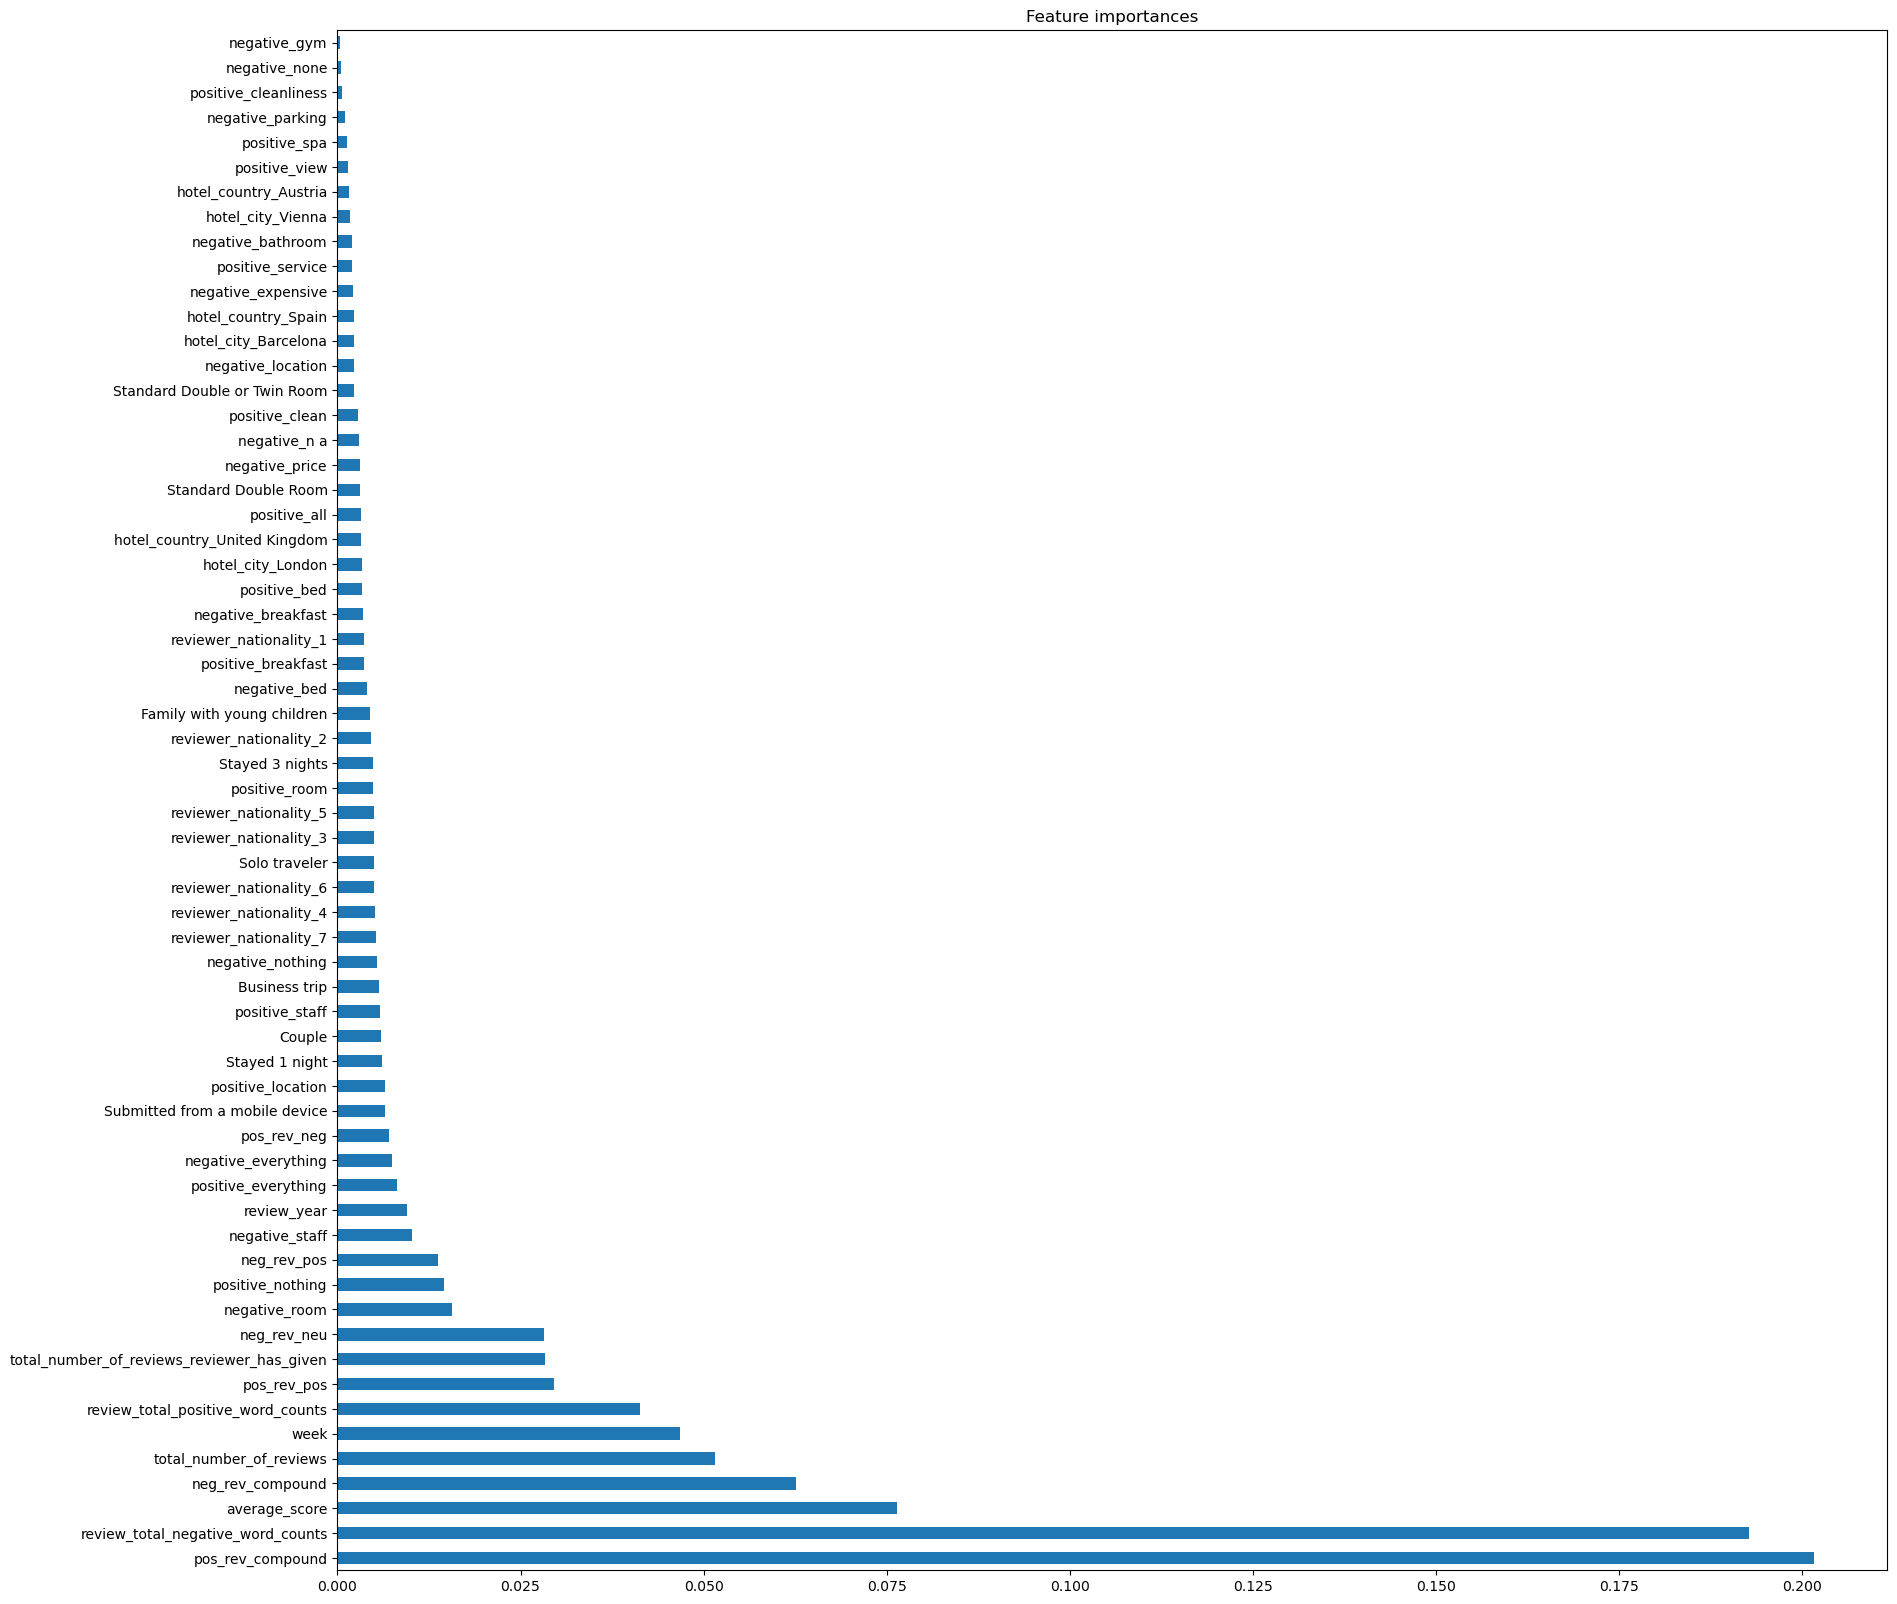

In [94]:
# выведем самые важные признаки для модели
plt.rcParams['figure.figsize'] = (20,20)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(90).plot(kind='barh')
plt.title('Feature importances')

### Показатель MAPE составил 11.67%.

## 6. Заключение

Формируем файл submission c оценками отелей в соответствии с построеной моделью для загрузки на сайт Kaggle.

In [95]:
# формируем код и выводим информацию data_test
data_test.sample(10)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,review_year,week,reviewer_nationality_1,reviewer_nationality_2,...,positive_clean,positive_cleanliness,positive_view,positive_spa,pos_rev_neg,neg_rev_neu,pos_rev_pos,neg_rev_pos,pos_rev_compound,neg_rev_compound
435618,9.3,0.019900,0.094304,0.049608,0.019108,0.0,2016,49,0,1,...,0,0,0,0,0.000,1.000,0.382,0.000,0.8505,0.0000
438009,8.2,0.027363,0.177603,0.070496,0.012739,0.0,2017,28,0,0,...,0,0,0,1,0.000,1.000,0.405,0.000,0.9274,0.0000
415464,6.7,0.159204,0.141757,0.044386,0.000000,0.0,2017,28,0,0,...,0,0,0,0,0.000,0.829,0.238,0.075,0.6560,-0.1117
411311,8.6,0.009950,0.085824,0.052219,0.006369,0.0,2016,14,0,0,...,0,0,0,0,0.122,1.000,0.000,0.000,-0.3590,0.0000
341632,8.7,0.087065,0.457870,0.007833,0.000000,0.0,2016,35,0,0,...,0,0,0,1,0.000,0.747,0.000,0.077,0.0000,-0.4019
375216,8.9,0.009950,0.162928,0.010444,0.003185,0.0,2015,41,0,0,...,0,0,0,0,0.000,1.000,0.000,0.000,0.0000,0.0000
397405,8.4,0.052239,0.069165,0.091384,0.012739,0.0,2016,1,0,0,...,0,0,0,0,0.044,0.648,0.229,0.000,0.7964,-0.7654
460904,8.4,0.042289,0.115174,0.067885,0.003185,0.0,2016,36,0,1,...,0,0,0,0,0.000,1.000,0.325,0.000,0.8777,0.0000
385142,7.6,0.184080,0.200878,0.104439,0.006369,0.0,2016,23,0,0,...,0,0,0,1,0.046,0.854,0.287,0.075,0.8906,0.0772
387248,8.3,0.121891,0.048175,0.010444,0.000000,0.0,2016,32,0,0,...,0,0,0,0,0.000,0.754,0.000,0.099,0.0000,-0.3384


In [96]:
# формируем код и удаляем признак "reviewer_score"
data_test= data_test.drop(['reviewer_score'], axis=1)

In [97]:
# формируем код и выводим оценку отелей на основе модели
predict_submission = regr.predict(data_test)
display(predict_submission)

array([8.79 , 7.19 , 8.595, ..., 8.12 , 9.448, 7.129])

In [98]:
# формируем код и записываем в файл submission оценки на основании модели
submission_df['reviewer_score'] = predict_submission
# записываем файл с оценками
submission_df.to_csv('data/submission_predict.csv', index=False)